In [1]:
import os
import gc
import sys
import glob
import numpy as np
import pandas as pd
import netCDF4 as nc
from datetime import datetime, timedelta
from matplotlib.cm import get_cmap
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import colors
import matplotlib.ticker as mticker

In [2]:
# To use PLUMBER2_GPP_common_utils, change directory to where it exists
os.chdir('/g/data/w97/mm3972/scripts/PLUMBER2/LSM_GPP_PLUMBER2')
from PLUMBER2_GPP_common_utils import *

# Check nc files

In [3]:
# Path of PLUMBER 2 dataset
lin_path          = "/g/data/w97/mm3972/data/PLUMBER2/1lin/Emp1lin_AU-Cpr.nc" #NEE
km27_path         = "/g/data/w97/mm3972/data/PLUMBER2/3km27/3km27_AU-Cpr_robust_output.nc" # NEE
km729_path        = "/g/data/w97/mm3972/data/PLUMBER2/6km729/6km729_AU-Cpr_robust_output.nc" # NEE
km729lag_path     = "/g/data/w97/mm3972/data/PLUMBER2/6km729lag/6km729shortlag_AU-Cpr_robust_output.nc" # NEE
RF_eb_path        = "/g/data/w97/mm3972/data/PLUMBER2/RF_eb/AU-Cpr_RF_output.nc" # NEE
RF_raw_path       = "/g/data/w97/mm3972/data/PLUMBER2/RF_raw/AU-Cpr_RF_output.nc" # NEE
LSTM_eb_path      = "/g/data/w97/mm3972/data/PLUMBER2/LSTM_eb/AU-Cpr_eb_cor_lstm_output.nc" # NEE
LSTM_raw_path     = "/g/data/w97/mm3972/data/PLUMBER2/LSTM_raw/AU-Cpr_lstm_output.nc" # NEE
CABLE_path        = "/g/data/w97/mm3972/data/PLUMBER2/CABLE/AU-Cpr_out.nc" # GPP, NEE
CABLE_POP_CN_path = "/g/data/w97/mm3972/data/PLUMBER2/CABLE-POP-CN/AU-Cpr_PLUMBER2_CN_out_cable.nc" # GPP, NEE
CHTESSEL_Ref_exp1_path= "/g/data/w97/mm3972/data/PLUMBER2/CHTESSEL_Ref_exp1/chtessel_exp1_insitu_AU-Cpr_2011-2017.nc"  # GPP, NEE
CLM5a_path        = "/g/data/w97/mm3972/data/PLUMBER2/CLM5a/AU-Cpr-CLM5.nc" # gpp
GFDL_path         = "/g/data/w97/mm3972/data/PLUMBER2/GFDL/AU-Cpr.nc" # GPP, NEE
JULES_GL9_path    = "/g/data/w97/mm3972/data/PLUMBER2/JULES_GL9/local_AU-Cpr_fluxnet2015_gl9.AU-Cpr.nc" # GPP
MATSIRO_path      = "/g/data/w97/mm3972/data/PLUMBER2/MATSIRO/AU-Cpr_2011-2017_OzFlux_out.nc" # none
MuSICA_path       = "/g/data/w97/mm3972/data/PLUMBER2/MuSICA/AU-Cpr_2011-2017_OzFlux-musica.nc" # GPP, NEE
NASAEnt_path      = "/g/data/w97/mm3972/data/PLUMBER2/NASAEnt/AU-Cpr_NASAEnt_Phase1.nc" # none
NoahMPv401_path   = "/g/data/w97/mm3972/data/PLUMBER2/NoahMPv401/NoahMPv401_UAlb_r1a_AU-Cpr.nc" # NEE
ORC2_r6593_path   = "/g/data/w97/mm3972/data/PLUMBER2/ORC2_r6593/AU-CprNewSchemeNewPFT.202111HIST_20110101_20171231_1M_sechiba_history.nc" # GPP, NEE
ORC3_r8120_path   = "/g/data/w97/mm3972/data/PLUMBER2/ORC3_r8120/AU-Cprplumber.202307HIST_20110101_20171231_1M_sechiba_history.nc" # GPP, NEE
QUINCY_path       = "/g/data/w97/mm3972/data/PLUMBER2/QUINCY/QUINCY_AU-Cpr.nc" # GPP, NEE
STEMMUS_SCOPE_path= "/g/data/w97/mm3972/data/PLUMBER2/STEMMUS-SCOPE/AU-Cpr_2022-07-28-1043_STEMMUS_SCOPE.nc" # GPP, NEE
PLUMBER2_path  = "/g/data/w97/mm3972/scripts/PLUMBER2/LSM_GPP_PLUMBER2/nc_files/AU-Cpr.nc" # GPP, NEE

site_names, IGBP_types, clim_types, model_names = load_default_list()

## Original

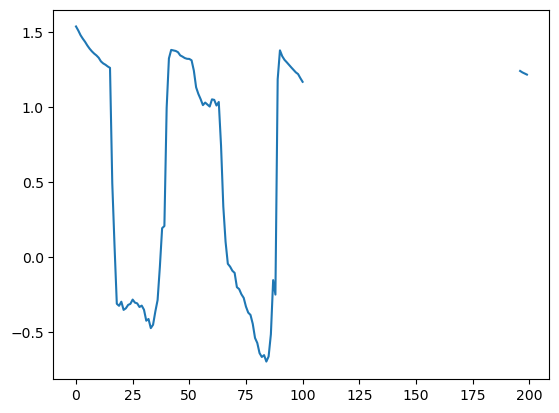

In [19]:
f_orig     = nc.Dataset(QUINCY_path, 'r') 
var        = f_orig.variables['NEE'][:,0,0]
plt.plot(var[20300:20500])

In [10]:
# vegetfrac  = f_orig.variables['patchfrac'][:,:]
vegetfrac  = f_orig.variables['vegetfrac'][:,:,0,0]
var_all = np.zeros(len(var[:,0]))

for i in np.arange(13):
    var_all     =  var_all+ var[:,i] * vegetfrac[:,i]

In [9]:
# plt.plot(var_all)

## Produced

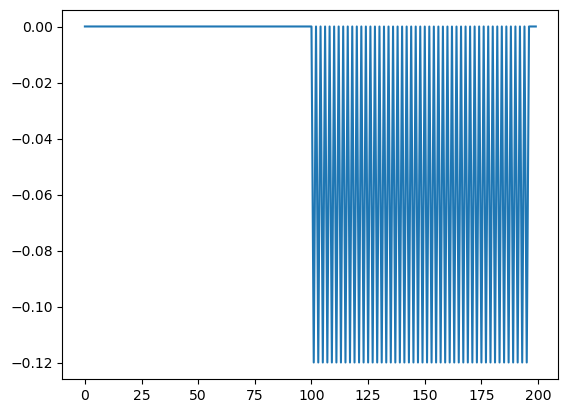

In [4]:
f_PLUMBER2      = nc.Dataset(PLUMBER2_path, 'r') 
var_processed   = f_PLUMBER2.variables['QUINCY_NEE'][:]
# GPP_quincy_processed = f_PLUMBER2.variables['QUINCY_GPP'][:]
plt.plot(var_processed[20300:20500])

In [5]:
var_processed

masked_array(data=[6.8283216e-06, 6.9627931e-06, 6.9837938e-06, ...,
                   1.1059208e-05, 1.0804397e-05, 1.0557118e-05],
             mask=False,
       fill_value=1e+20,
            dtype=float32)

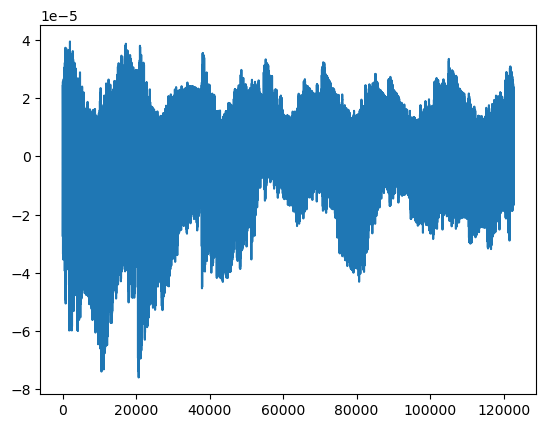

In [7]:
var_processed   = f_PLUMBER2.variables['CABLE_NEE'][:]
plt.plot(var_processed)

In [ ]:
abnomal value in RF_eb_NEE and RF_raw_NEE, both orig & processed 
MuSICA's NEE looks problematic
ORC2_r6593 & ORC3_r8120's NEE also looks weird
the processed QUINCY is wrong!!! while in original data QUINCY's NEE has a period 

# Check QUINCY -9999 values

In [6]:
f_orig     = nc.Dataset(QUINCY_path, 'r') 
var        = f_orig.variables['NEE'][:].data
for attr in ['_FillValue', '_fillValue', 'missing_value']:
    if hasattr(f_orig.variables['NEE'], attr):
        var_FillValue = getattr(f_orig.variables['NEE'], attr)
        break
else:
    var_FillValue = None

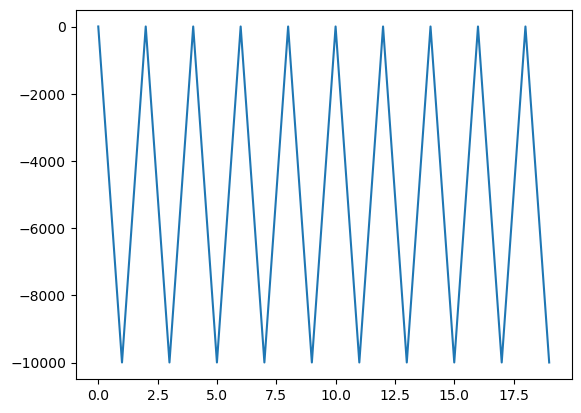

In [7]:
plt.plot(var[20400:20420,0,0])

In [50]:
var[20400:20420,0,0]

masked_array(data=[1.1701115369796753, --, 1.150437593460083, --,
                   1.137119174003601, --, 1.119470238685608, --,
                   1.1036430597305298, --, 1.0916343927383423, --,
                   1.079813003540039, --, 1.0650361776351929, --,
                   1.049267292022705, --, 1.035451889038086, --],
             mask=[False,  True, False,  True, False,  True, False,  True,
                   False,  True, False,  True, False,  True, False,  True,
                   False,  True, False,  True],
       fill_value=-9999.0,
            dtype=float32)

In [8]:
if var_FillValue is not None:
    var = np.where(var == var_FillValue, np.nan, var)

In [9]:
var[20400:20420,0,0]

array([1.1701115,       nan, 1.1504376,       nan, 1.1371192,       nan,
       1.1194702,       nan, 1.1036431,       nan, 1.0916344,       nan,
       1.079813 ,       nan, 1.0650362,       nan, 1.0492673,       nan,
       1.0354519,       nan], dtype=float32)

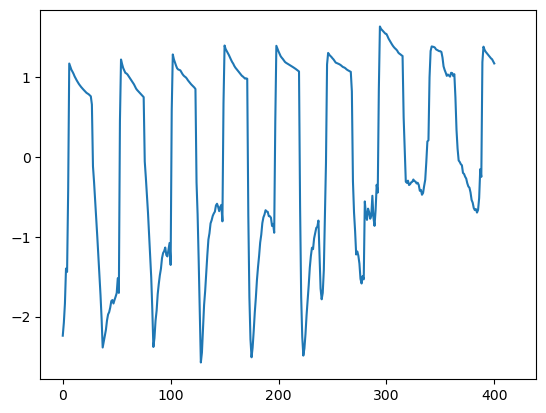

In [11]:
plt.plot(var[20000:20420,0,0])